In this notebook we will show how to perform a Granger Causality analysis, and demonstrate how poorly it performs on our simulated data.

In [4]:
import os,sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools

from dcm_sim import sim_dcm_dataset

sys.path.insert(0,'../')
from utils.graph_utils import show_graph_from_adjmtx,show_graph_from_pattern

# first we simulate some data using our DCM model, with the same HRF across all regions

_,data_conv,params=sim_dcm_dataset(verbose=True)

A=params['A']
B=params['B']
C=params['C']

data=data_conv[range(0,data_conv.shape[0],int(1./params['stepsize']))]


A
[[-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.]
 [ 0.  1.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]]
B
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
C
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


Now compute Granger causality across all pairs of timeseries

In [5]:
gc=numpy.zeros(A.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[0]):
        if i==j:  # don't compute self-connectivity
            continue
        result=statsmodels.tsa.stattools.grangercausalitytests(data[:,[i,j]],1)
        if result[1][0]['params_ftest'][1]<0.05:
            gc[i,j]=1
        


Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=9.1313  , p=0.0027  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=9.2239  , p=0.0024  , df=1
likelihood ratio test: chi2=9.0845  , p=0.0026  , df=1
parameter F test:         F=9.1313  , p=0.0027  , df_denom=296, df_num=1

Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.3328  , p=0.5644  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=0.3362  , p=0.5620  , df=1
likelihood ratio test: chi2=0.3360  , p=0.5621  , df=1
parameter F test:         F=0.3328  , p=0.5644  , df_denom=296, df_num=1

Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=0.0275  , p=0.8684  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=0.0278  , p=0.8676  , df=1
likelihood ratio test: chi2=0.0278  , p=0.8676  , df=1
parameter F test:         F=0.0275  , p=0.8684  , df_denom=296, df_num=1

Granger Causality
('number of lags (no zero)', 1)
ssr based F test:         F=

[(1, 0), (1, 2), (1, 3), (1, 4), (2, 1), (3, 1), (4, 0), (4, 1)]
Black: input
Red: unmodulated


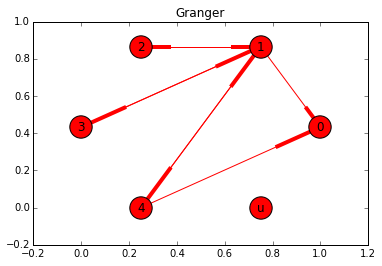

[(0, 2), (0, 4), (1, 2), (1, 3), ('u', 0)]
Black: input
Red: unmodulated
Blue: modulated


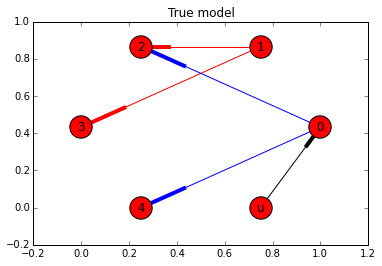

In [6]:
show_graph_from_adjmtx(gc,numpy.zeros(B.shape),numpy.zeros(C.shape),title='Granger')
show_graph_from_adjmtx(A,B,C,title='True model')


Exercise: Try running this notebook a few times, and watch how the GC results vary from run to run.